## Spectrum of the Instantanous Hamiltonian

Imports

In [7]:
from src.qutip_lab.qutip_class import SpinOperator, SpinHamiltonian, SteadyStateSolver
from tqdm.notebook import trange 
import numpy as np
import matplotlib.pyplot as plt
import qutip

Data

In [ ]:
# time=np.linspace(0,20,2000)
# h=np.ones((1,2000,2,8))

# hi=2.
# hf=1.
# delta=0.5
# rate=1.

# # build up the field
# h[0,:,0,:]=hi*np.exp(-rate*time)+hf*(1-np.exp(-rate*time))

Span of the fields

In [50]:
linear_grid=1
h=np.ones((linear_grid))
omega=np.ones((linear_grid))

h[:]=np.linspace(3,3,linear_grid)
omega=np.linspace(3,3,linear_grid)
l=3
id=np.ones(l)

In [51]:
spectrum=np.ones((3,linear_grid,linear_grid))
m=np.zeros((linear_grid,linear_grid,3))
for j in trange(linear_grid):
    for i in range(linear_grid):
        ham0 = SpinHamiltonian(
            direction_couplings=[("z", "z")],
            pbc=True,
            coupling_values=[1.0],
            size=l,
        )

        hamExtX = SpinOperator(
            index=[("x", i) for i in range(l)], coupling=omega[j]*id, size=l
        )
        hamExtZ = SpinOperator(
            index=[("z", i) for i in range(l)], coupling=h[i]*id, size=l
        )

        eng_sp, psi0 = np.linalg.eigh(hamExtZ.qutip_op + hamExtX.qutip_op)
        print(psi0[:,0])
        psi0 = qutip.Qobj(psi0[:, 0], shape=psi0.shape, dims=([[2 for i in range(l)], [1]]))
        x_op = SpinOperator(
            index=[("x", 0) ], coupling=[1], size=l
        )
        y_op = SpinOperator(
            index=[("y", 0) ], coupling=[1], size=l
        )

        z_op = SpinOperator(
            index=[("z", 0) ], coupling=[1], size=l
        )
        
        
        m[i,j,0]=x_op.expect_value(psi0)
        m[i,j,1]=y_op.expect_value(psi0)
        m[i,j,2]=z_op.expect_value(psi0)
        
        
        
        #spectrum[:,j,i]=eng_sp[:3]
        

  0%|          | 0/1 [00:00<?, ?it/s]

[-0.05604269+0.j  0.13529903+0.j  0.13529903+0.j -0.32664074+0.j
  0.13529903+0.j -0.32664074+0.j -0.32664074+0.j  0.78858051+0.j]


Check the magnetization

In [52]:
print(m[:,:,1])
#print(spectrum[:,4,4])
print(psi0.data)
#print(y_op.qutip_op.data)

[[0.]]
  (0, 0)	(-0.056042691145995485+0j)
  (1, 0)	(0.1352990250365489+0j)
  (2, 0)	(0.13529902503654923+0j)
  (3, 0)	(-0.3266407412190939+0j)
  (4, 0)	(0.1352990250365491+0j)
  (5, 0)	(-0.32664074121909403+0j)
  (6, 0)	(-0.32664074121909414+0j)
  (7, 0)	(0.7885805074747376+0j)


Plot of the Spectrum

[-8. -8. -4.]


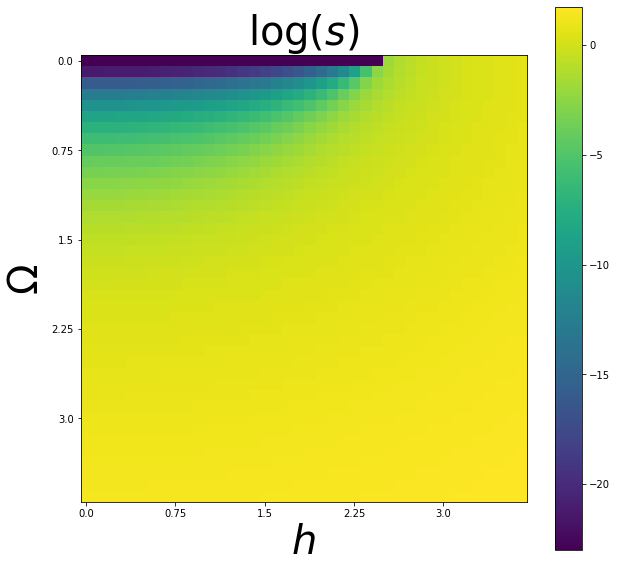

In [29]:
fig=plt.figure(figsize=(10,10))
plt.title(r'$\log(s)$',fontsize=40)
print(spectrum[:,0,0])
plt.imshow(np.log(np.abs(spectrum[1]-spectrum[0] +10**-10)))
xticks_label=np.linspace(0,3,5)
yticks_label=np.linspace(0,3,5)
plt.xticks(np.arange(0,linear_grid,linear_grid//5),xticks_label)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\Omega$',fontsize=40)
plt.yticks(np.arange(0,linear_grid,linear_grid//5),yticks_label)
plt.colorbar()
plt.show()
